In [2]:
import numpy as np
import pandas as pd

In [3]:
laptop=pd.read_csv("laptop_data.csv")

In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
laptop.duplicated().sum()

0

In [6]:
laptop.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
laptop=laptop.drop(columns="Unnamed: 0")

In [8]:
laptop["Ram"]=laptop["Ram"].str.replace("GB","").astype("Int8")

In [9]:
laptop["Weight"]=laptop["Weight"].str.replace("kg",'').astype("float")

In [10]:
laptop.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   Int8   
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: Int8(1), float64(3), object(7)
memory usage: 104.5+ KB


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

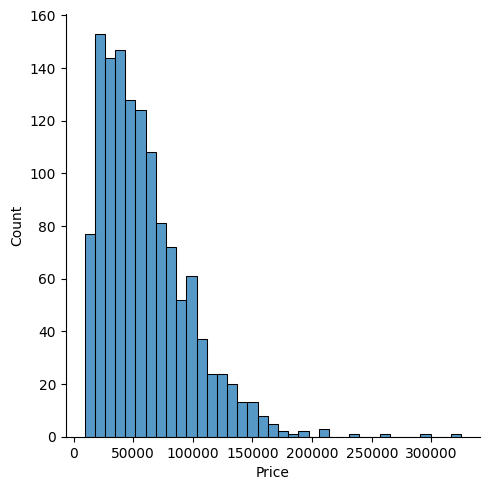

In [13]:
sns.displot(laptop["Price"])

<Axes: xlabel='Company'>

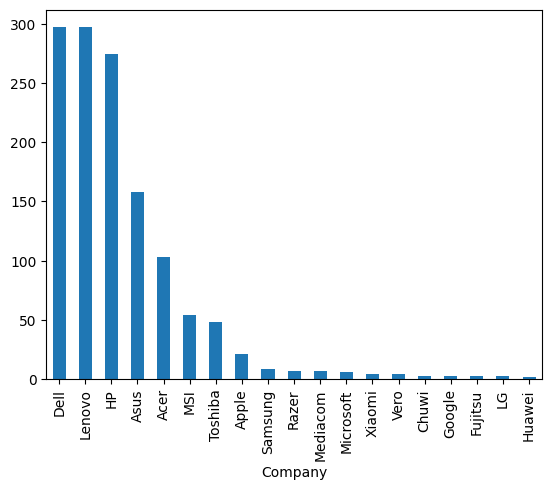

In [14]:
laptop['Company'].value_counts().plot(kind="bar")

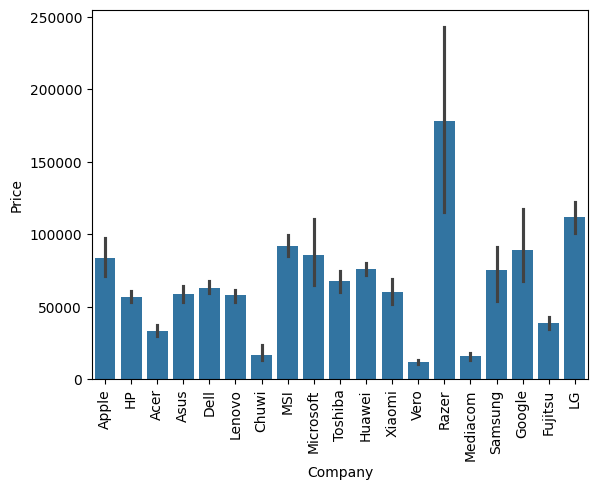

In [15]:
sns.barplot(x=laptop["Company"],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

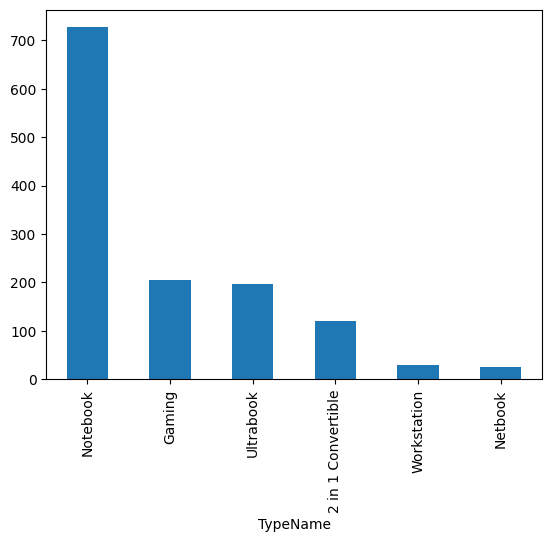

In [16]:
laptop['TypeName'].value_counts().plot(kind="bar")

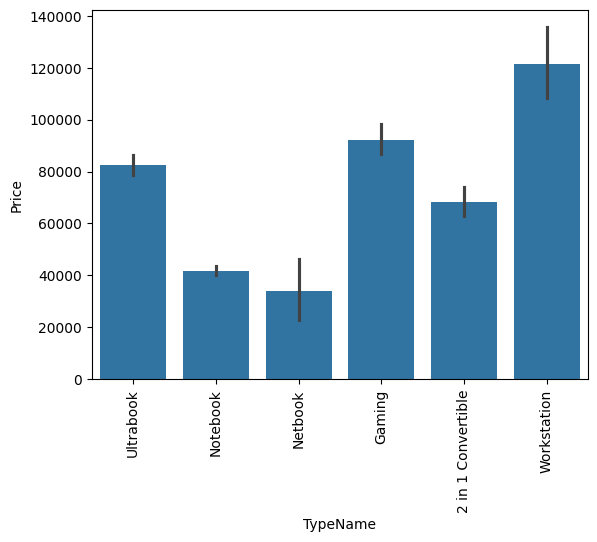

In [17]:
sns.barplot(x=laptop["TypeName"],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

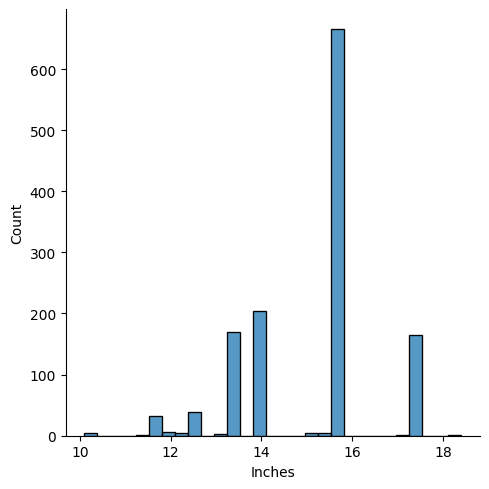

In [18]:
sns.displot(laptop["Inches"])

In [19]:
laptop["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [20]:
laptop['ScreenResolution'].str.split(" ")

0                [IPS, Panel, Retina, Display, 2560x1600]
1                                              [1440x900]
2                                   [Full, HD, 1920x1080]
3                [IPS, Panel, Retina, Display, 2880x1800]
4                [IPS, Panel, Retina, Display, 2560x1600]
                              ...                        
1298    [IPS, Panel, Full, HD, /, Touchscreen, 1920x1080]
1299    [IPS, Panel, Quad, HD+, /, Touchscreen, 3200x1...
1300                                           [1366x768]
1301                                           [1366x768]
1302                                           [1366x768]
Name: ScreenResolution, Length: 1303, dtype: object

In [21]:
laptop["Touchscreen"]=laptop["ScreenResolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [22]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
661,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.20,22324.32,0
901,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.12,0
796,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.63,15930.72,0
74,Acer,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.10,20725.92,0
124,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,2.10,24029.28,0


<Axes: xlabel='Touchscreen'>

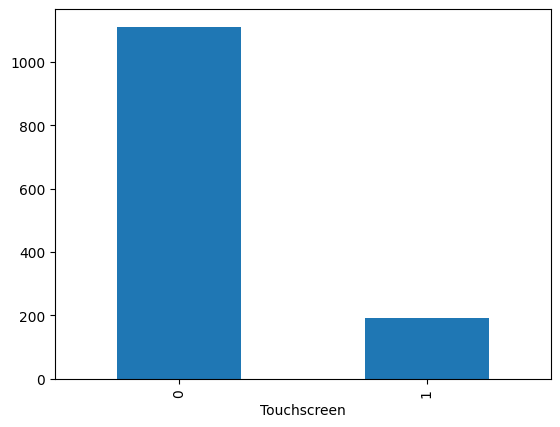

In [23]:
laptop['Touchscreen'].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

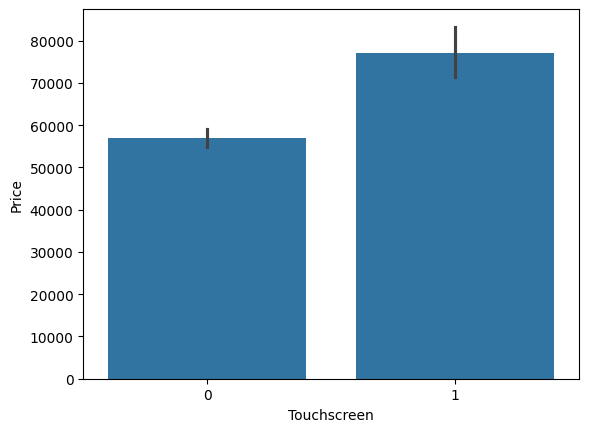

In [24]:
sns.barplot(x=laptop["Touchscreen"],y=laptop["Price"])

In [25]:
laptop["IPS"]=laptop["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
683,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242.72,0,1
209,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,31808.16,0,0
1102,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,4,16GB SSD,Intel HD Graphics,Chrome OS,2.20,11135.52,0,0
454,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.36,52161.12,0,0
286,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.95,58448.16,0,1


In [26]:
laptop["IPS"].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

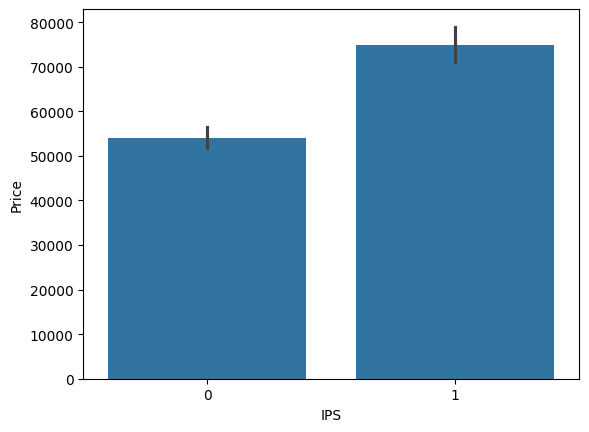

In [27]:
sns.barplot(x=laptop['IPS'],y=laptop["Price"])

In [28]:
new=laptop["ScreenResolution"].str.split('x',n=1,expand=True)
laptop['X_res']=new[0]
laptop['Y_res']=new[1]

In [29]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1067,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.62,42517.9728,1,0,Full HD / Touchscreen 1920,1080
1000,Acer,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,67132.8000,0,1,IPS Panel Full HD 1920,1080
159,Toshiba,Notebook,15.6,1366x768,Intel Core i3 6006U 2.2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,23816.1600,0,0,1366,768
1200,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,AMD Radeon R7 M440,Windows 10,2.30,26586.7200,0,0,1366,768
311,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,1.21,133146.7200,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160


In [30]:
laptop['X_res'] = laptop['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [31]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
219,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.62,68145.1200,1,0,1920,1080
654,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,19441.8720,0,0,1366,768
832,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920,Linux,2.10,27652.3200,0,0,1920,1080
1137,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.50,41771.5200,0,0,1366,768
692,HP,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,500GB HDD,Nvidia Quadro M1200,Windows 10,3.14,101657.7072,0,0,1920,1080


In [32]:
laptop['X_res']=laptop['X_res'].astype(int)
laptop['Y_res']=laptop['Y_res'].astype(int)

In [33]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   Int8   
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: Int8(1), float64(3), int32(2), int64(2), object(7)
memory usage: 135.0+ KB


In [34]:
laptop.select_dtypes(include='number').corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [35]:
laptop['ppi']=((laptop['X_res']**2 + laptop['Y_res']**2)**0.5)/laptop['Inches']

In [36]:
laptop.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [37]:
laptop.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
175,Dell,Notebook,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,100.454670
821,Toshiba,Ultrabook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.25,58075.2000,0,0,111.935204
574,Lenovo,Notebook,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.05,36496.8000,0,0,141.211998
378,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15238.0800,0,0,111.935204
1236,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,117119.5632,0,0,209.800683


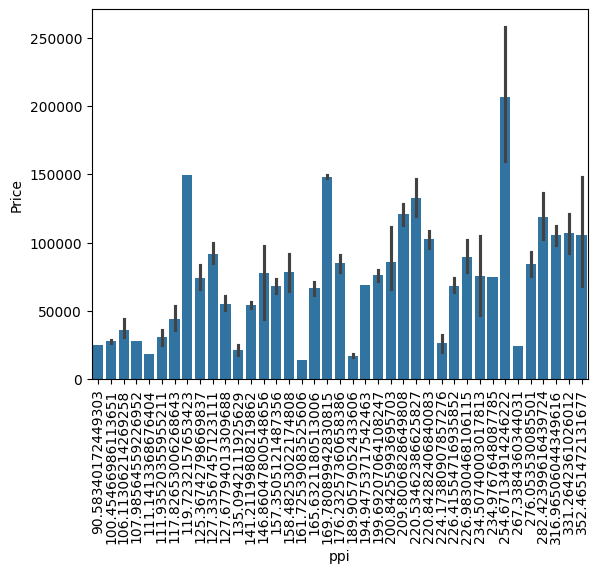

In [38]:
sns.barplot(x=laptop['ppi'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
laptop['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [40]:
laptop['CPU name']=laptop['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [41]:
laptop.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU name
1144,HP,2 in 1 Convertible,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,95850.7200,1,0,220.842824,Intel Core i7
131,Dell,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,23922.7200,0,0,141.211998,Intel Core i3
541,Dell,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.60,39207.1536,0,0,157.350512,Intel Core i3
945,Lenovo,Gaming,AMD FX 8800P 2.1GHz,16,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.50,53226.7200,0,1,141.211998,AMD FX 8800P
774,HP,Ultrabook,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,66280.3200,0,0,125.367428,Intel Core i5


In [42]:
laptop["CPU name"].value_counts()

CPU name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [43]:
def fetch_processor(text):
    if(text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3'):
        return text
    else:
        if(text.split()[0]=='Intel'):
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [44]:
laptop["CPU brand"]=laptop['CPU name'].apply(fetch_processor)

In [45]:
laptop.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU name,CPU brand
371,Acer,Notebook,AMD A9-Series 9420 3GHz,4,128GB SSD,AMD Radeon R5,Windows 10,2.10,22697.28,0,0,100.454670,AMD A9-Series 9420,AMD Processor
504,Lenovo,Netbook,Intel Celeron Dual Core N3060 1.6GHz,4,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.20,0,0,135.094211,Intel Celeron Dual,Other Intel Processor
171,HP,Notebook,Intel Core i5 7200U 2.5GHz,6,2TB HDD,AMD Radeon 520,Windows 10,2.71,37242.72,0,1,127.335675,Intel Core i5,Intel Core i5
995,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,61272.00,0,0,276.053530,Intel Core i5,Intel Core i5
637,Lenovo,Notebook,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.42,13266.72,0,0,111.935204,Intel Celeron Dual,Other Intel Processor


<Axes: xlabel='CPU brand'>

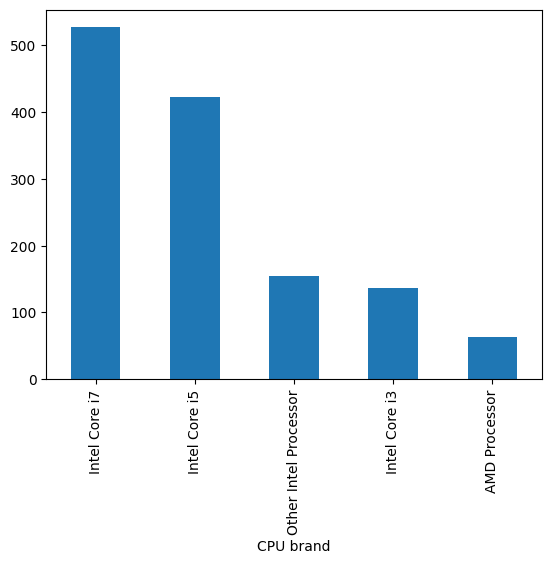

In [46]:
laptop['CPU brand'].value_counts().plot(kind='bar')

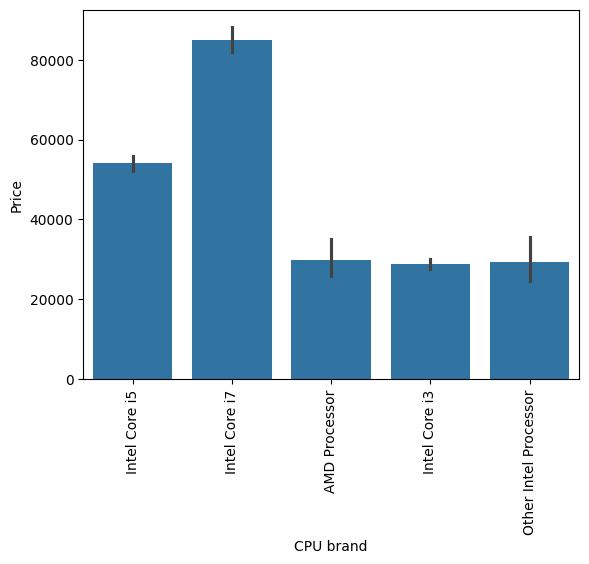

In [47]:
sns.barplot(x=laptop['CPU brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
laptop.drop(columns=['Cpu','CPU name'],inplace=True)

In [49]:
laptop.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU brand
809,Lenovo,Notebook,4,1TB HDD,Nvidia GeForce 920M,Windows 10,2.40,32447.52,0,0,141.211998,Intel Core i5
143,Toshiba,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,32074.56,0,0,100.454670,Intel Core i5
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,157.350512,Intel Core i7
504,Lenovo,Netbook,4,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.20,0,0,135.094211,Other Intel Processor
753,Lenovo,Ultrabook,4,180GB SSD,Intel HD Graphics 520,Windows 10,1.70,58394.88,0,0,157.350512,Intel Core i5


In [50]:
laptop['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [52]:
# Convert 'Memory' column to string and remove any '.0'
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)

# Remove 'GB' and 'TB' (replace 'TB' with '000')
laptop["Memory"] = laptop["Memory"].str.replace('GB', '').str.replace('TB', '000')

# Split the 'Memory' column on '+', expanding into two columns
new = laptop["Memory"].str.split("+", n=1, expand=True)

# Assign the first part to 'first' and strip any leading/trailing whitespace
laptop["first"] = new[0].str.strip()

# Assign the second part to 'second', handling NaN values by replacing them with "0"
laptop["second"] = new[1].fillna("0").str.strip()

# Determine the type of storage for 'first' part
laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove all non-digit characters from 'first'
laptop['first'] = laptop['first'].str.replace(r'\D', '', regex=True)

# Determine the type of storage for 'second' part
laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove all non-digit characters from 'second'
laptop['second'] = laptop['second'].str.replace(r'\D', '', regex=True)

# Convert 'first' and 'second' to integers
laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

# Calculate the total amount for each type of storage
laptop["HDD"] = (laptop["first"] * laptop["Layer1HDD"] + laptop["second"] * laptop["Layer2HDD"])
laptop["SSD"] = (laptop["first"] * laptop["Layer1SSD"] + laptop["second"] * laptop["Layer2SSD"])
laptop["Hybrid"] = (laptop["first"] * laptop["Layer1Hybrid"] + laptop["second"] * laptop["Layer2Hybrid"])
laptop["Flash_Storage"] = (laptop["first"] * laptop["Layer1Flash_Storage"] + laptop["second"] * laptop["Layer2Flash_Storage"])

# Drop the intermediate columns
laptop.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\abhis\AppData\Local\Temp\ipykernel_5260\2599522285.py:2: SyntaxWarning: invalid escape sequence '\.'
  laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)


In [55]:
laptop.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU brand,HDD,SSD,Hybrid,Flash_Storage
87,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.96,31914.1872,0,0,141.211998,Intel Core i5,0,256,0,0
576,Toshiba,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.24,99367.2000,1,0,157.350512,Intel Core i7,0,512,0,0
856,Asus,Notebook,4,1000 HDD,Intel HD Graphics 505,Windows 10,2.00,23922.7200,0,0,100.454670,Other Intel Processor,1000,0,0,0
1209,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.20,130482.7200,0,0,141.211998,Intel Core i7,1000,256,0,0
471,HP,Notebook,8,500 HDD,AMD FirePro W4190M,Windows 10,1.90,61485.1200,0,0,141.211998,Intel Core i5,500,0,0,0


In [56]:
laptop.drop(columns=['Memory'],inplace=True)

In [59]:
laptop.select_dtypes(include='number').corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [60]:
laptop.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [62]:
laptop['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [64]:
laptop['Gpu brand'] = laptop['Gpu'].apply(lambda x:x.split()[0])

In [65]:
laptop['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [66]:
laptop = laptop[laptop['Gpu brand'] != 'ARM']

In [67]:
laptop['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

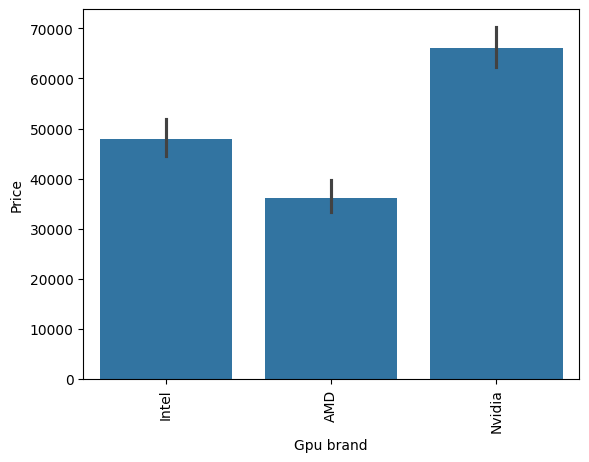

In [68]:
sns.barplot(x=laptop['Gpu brand'],y=laptop['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [69]:
laptop.drop(columns=['Gpu'],inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_5260\2335623913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['Gpu'],inplace=True)


In [70]:
laptop.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU brand,HDD,SSD,Gpu brand
233,Dell,Notebook,8,Windows 10,1.60,45767.52,0,0,157.350512,Intel Core i5,0,256,Intel
865,HP,Notebook,4,Windows 10,2.07,48484.80,0,0,141.211998,Intel Core i5,500,0,Intel
917,MSI,Gaming,16,Windows 10,2.70,85194.72,0,0,127.335675,Intel Core i7,1000,256,Nvidia
521,HP,Ultrabook,8,Windows 10,1.32,74538.72,0,1,165.632118,Intel Core i7,0,256,Intel
1071,HP,Notebook,4,Windows 10,2.31,63882.72,0,0,100.454670,Intel Core i5,500,0,Intel


In [71]:
laptop['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

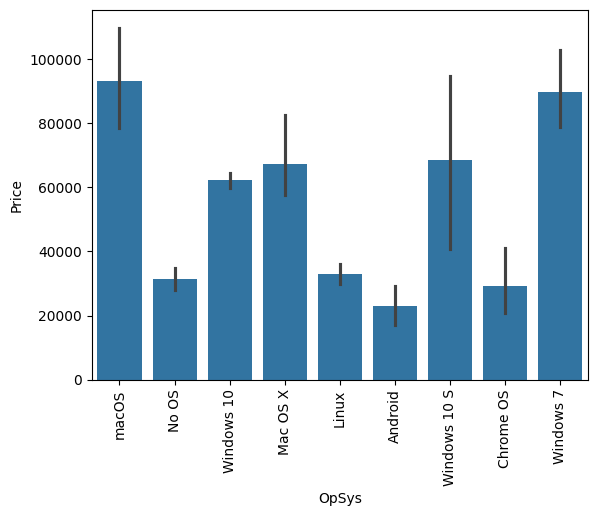

In [72]:
sns.barplot(x=laptop['OpSys'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [74]:
laptop['os'] = laptop['OpSys'].apply(cat_os)

C:\Users\abhis\AppData\Local\Temp\ipykernel_5260\2647830164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop['os'] = laptop['OpSys'].apply(cat_os)


In [75]:
laptop.drop(columns=['OpSys'],inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_5260\3983052306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['OpSys'],inplace=True)


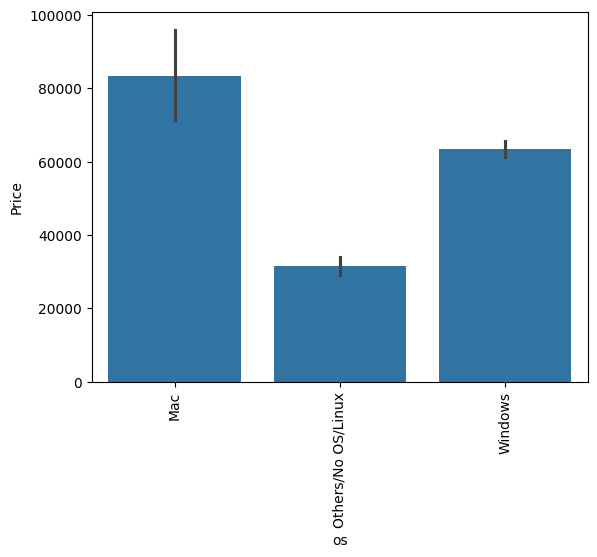

In [76]:
sns.barplot(x=laptop['os'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\abhis\AppData\Local\Temp\ipykernel_5260\2547187844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

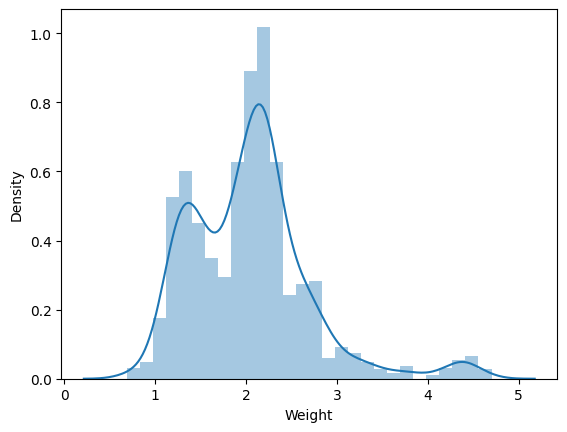

In [77]:
sns.distplot(laptop['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

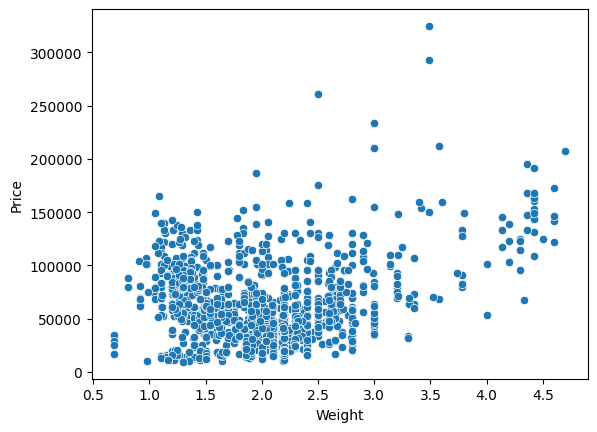

In [78]:
sns.scatterplot(x=laptop['Weight'],y=laptop['Price'])

In [79]:
laptop.select_dtypes(include='number').corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

C:\Users\abhis\AppData\Local\Temp\ipykernel_5260\3984844542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop['Price']))


<Axes: xlabel='Price', ylabel='Density'>

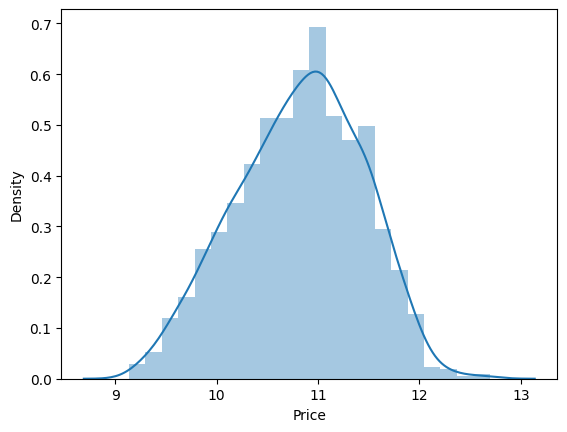

In [80]:
sns.distplot(np.log(laptop['Price']))

In [81]:
X = laptop.drop(columns=['Price'])
y = np.log(laptop['Price'])

In [82]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,CPU brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [83]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [85]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,CPU brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [88]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


In [91]:
import pickle

pickle.dump(laptop,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))